In [3]:
import subprocess
import re
import pandas as pd

# Function to run the CUDA binary and capture its output
def run_mapping_demo(dimx, dimy):
    # Run the binary with the current dimx and dimy
    command = ["/home/ruthvik/ME471-571/Week_13/Tues/mapping_demo", "--dimx", str(dimx), "--dimy", str(dimy), "--host", "1"]
    
    try:
        result = subprocess.run(command, capture_output=True, text=True, check=True)
        return result.stdout  # Return the output of the command
    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
        return None

# Function to parse the output for relevant values
def parse_output(output):
    parsed_data = {}

    # Regex to extract specific data
    total_device_time = re.search(r"Total device time\s+([0-9.]+)", output)
    host_time = re.search(r"Host\s+([0-9.]+)", output)
    grid_x = re.search(r"grid\.x, block\.x\s+([0-9]+)\s+([0-9]+)", output)
    grid_y = re.search(r"grid\.y, block\.y\s+([0-9]+)\s+([0-9]+)", output)

    if total_device_time:
        parsed_data["Total Device Time (s)"] = float(total_device_time.group(1))
    if host_time:
        parsed_data["Host Time (s)"] = float(host_time.group(1))
    if grid_x:
        parsed_data["grid.x"] = int(grid_x.group(1))
        parsed_data["block.x"] = int(grid_x.group(2))
    if grid_y:
        parsed_data["grid.y"] = int(grid_y.group(1))
        parsed_data["block.y"] = int(grid_y.group(2))

    return parsed_data

# Create an empty list to accumulate results
data = []

# Sweep through possible values of dimx and dimy
for dimx in range(1, 33):  # Example range for dimx (up to 32)
    for dimy in range(1, 33):  # Example range for dimy (up to 32)
        if dimx * dimy <= 1024:  # Ensure the product of dimx and dimy is <= 1024
            print(f"Running for dimx={dimx}, dimy={dimy}...")
            
            # Run the CUDA binary and capture its output
            output = run_mapping_demo(dimx, dimy)
            
            if output:
                # Parse the output and extract the relevant data
                parsed_data = parse_output(output)
                parsed_data["dimx"] = dimx
                parsed_data["dimy"] = dimy
                
                # Append the parsed data to the list
                data.append(parsed_data)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file or display it
df.to_csv("mapping_demo_results.csv", index=False)
print(df)


Running for dimx=1, dimy=1...
Running for dimx=1, dimy=2...
Running for dimx=1, dimy=3...
Running for dimx=1, dimy=4...
Running for dimx=1, dimy=5...
Running for dimx=1, dimy=6...
Running for dimx=1, dimy=7...
Running for dimx=1, dimy=8...
Running for dimx=1, dimy=9...
Running for dimx=1, dimy=10...
Running for dimx=1, dimy=11...
Running for dimx=1, dimy=12...
Running for dimx=1, dimy=13...
Running for dimx=1, dimy=14...
Running for dimx=1, dimy=15...
Running for dimx=1, dimy=16...
Running for dimx=1, dimy=17...
Running for dimx=1, dimy=18...
Running for dimx=1, dimy=19...
Running for dimx=1, dimy=20...
Running for dimx=1, dimy=21...
Running for dimx=1, dimy=22...
Running for dimx=1, dimy=23...
Running for dimx=1, dimy=24...
Running for dimx=1, dimy=25...
Running for dimx=1, dimy=26...
Running for dimx=1, dimy=27...
Running for dimx=1, dimy=28...
Running for dimx=1, dimy=29...
Running for dimx=1, dimy=30...
Running for dimx=1, dimy=31...
Running for dimx=1, dimy=32...
Running for dimx=

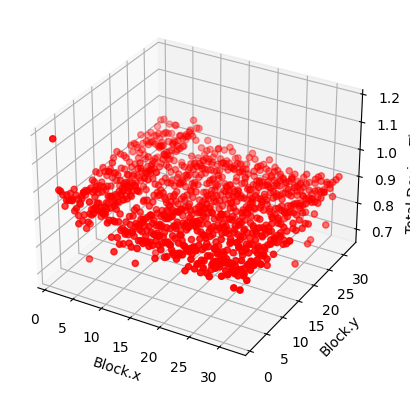

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('mapping_demo_results.csv')
%matplotlib inline
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['block.x'], df['block.y'], df['Total Device Time (s)'], c='r', marker='o')

# Set labels
ax.set_xlabel('Block.x')
ax.set_ylabel('Block.y')
ax.set_zlabel('Total Device Time (s)')

# Show plot
plt.show()


In [24]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [18]:
df = pd.read_csv('mapping_demo_results.csv')
%matplotlib inline

In [20]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# Ensure plotly renders inline in the notebook
pio.renderers.default = 'iframe'

# Replace this with your actual DataFrame
df = pd.DataFrame(data)

# Prepare grid data for surface plot
block_x = df['block.x'].unique()
block_y = df['block.y'].unique()

# Create mesh grid
X, Y = np.meshgrid(block_x, block_y)

# Reshape the Z values (Total Device Time) accordingly
Z = np.zeros(X.shape)

for i in range(len(block_x)):
    for j in range(len(block_y)):
        # Find the corresponding Total Device Time (s) for block.x and block.y
        matching_row = df[(df['block.x'] == block_x[i]) & (df['block.y'] == block_y[j])]
        if not matching_row.empty:
            Z[j, i] = matching_row['Total Device Time (s)'].values[0]

# Create a surface plot using Plotly
surface = go.Surface(z=Z, x=block_x, y=block_y, colorscale='Viridis')

# Layout for the plot
layout = go.Layout(
    title='Interactive Surface Plot of Total Device Time',
    scene=dict(
        xaxis_title='Block.x',
        yaxis_title='Block.y',
        zaxis_title='Total Device Time (s)'
    )
)

# Create a figure and display
fig = go.Figure(data=[surface], layout=layout)
fig.show()


In [21]:
df.head(100)

,Total Device Time (s),Host Time (s),grid.x,block.x,grid.y,block.y,dimx,dimy
0,1.180,0.547,16384,1,16384,1,1,1
1,0.988,0.571,16384,1,8192,2,1,2
2,0.960,0.432,16384,1,5462,3,1,3
3,0.949,0.542,16384,1,4096,4,1,4
4,0.944,0.542,16384,1,3277,5,1,5
...,...,...,...,...,...,...,...,...
95,0.933,0.540,5462,3,512,32,3,32
96,0.979,0.544,4096,4,16384,1,4,1
97,0.940,0.543,4096,4,8192,2,4,2
98,0.949,0.671,4096,4,5462,3,4,3


In [25]:
df[(df.dimx>=1) & (df.dimx<8)]

,Total Device Time (s),Host Time (s),grid.x,block.x,grid.y,block.y,dimx,dimy
0,1.180,0.547,16384,1,16384,1,1,1
1,0.988,0.571,16384,1,8192,2,1,2
2,0.960,0.432,16384,1,5462,3,1,3
3,0.949,0.542,16384,1,4096,4,1,4
4,0.944,0.542,16384,1,3277,5,1,5
5,0.948,0.541,16384,1,2731,6,1,6
6,0.902,0.543,16384,1,2341,7,1,7
7,0.902,0.539,16384,1,2048,8,1,8
8,0.895,0.552,16384,1,1821,9,1,9
9,0.903,0.540,16384,1,1639,10,1,10


````
//  --- General Information for device 0 ---
// Name:  NVIDIA RTX A5500 Laptop GPU
//
// Compute capability    :             8.6
// Clock rate            :            1.50 (GHz)
//
//   --- Memory Information for device 0 ---
// Total global mem      :            15.7 (gb)
//
//   --- MP Information for device 0 ---
// Multiprocessor count :              58
// Shared mem per mp     :            48.0 (kb)
// Registers per mp      :            64.0 (kb)
// Threads in warp       :              32
// Max threads per block :            1024
// Max thread dimensions:  (1024, 1024, 64)
// Max grid dimensions  :  2147483647, 65535, 65535
````